In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import scipy as sp
from scipy import sparse
import sklearn
from sklearn.decomposition import TruncatedSVD

from openTSNE import TSNE
from openTSNE import affinity, initialization, TSNEEmbedding
from openTSNE.affinity import Affinities

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

In [2]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [3]:
import umap

In [4]:
variables_path = Path("./data/variables/")
figures_path = Path("./viz/embeddings")
embeddings_data_path = Path("data/embeddings/")

In [5]:
# plt.style.use("matplotlib_style.txt")

Pipeline from PubMedBERT embeddings to two dimensional embedding

# Import data

In [6]:
%%time
%%memit
embeddings_reparsed_all = np.load(
    embeddings_data_path
    / "embeddings_microsoft_BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext.npy"
)

peak memory: 395.19 MiB, increment: 104.25 MiB
CPU times: user 64.2 ms, sys: 29.9 ms, total: 94.1 ms
Wall time: 534 ms


In [7]:
embeddings_reparsed_all.shape

(19607, 768)

# UMAP
- see docu https://github.com/lmcinnes/umap/blob/master/umap/umap_.py
- Note: default metric is "euclidean"

In [ ]:
jupyter notebook --NotebookApp.max_buffer_size=12000000000


In [8]:
reducer = umap.UMAP()

In [9]:
embedding = reducer.fit_transform(embeddings_reparsed_all)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [14]:
# hellinger_embedding = umap.UMAP(metric='kl').fit(embeddings_reparsed_all)

In [17]:
embedding.shape

(19607, 2)

In [20]:
# umap = np.array(E)

# save
np.save(variables_path / "umap_reparsed", embedding)

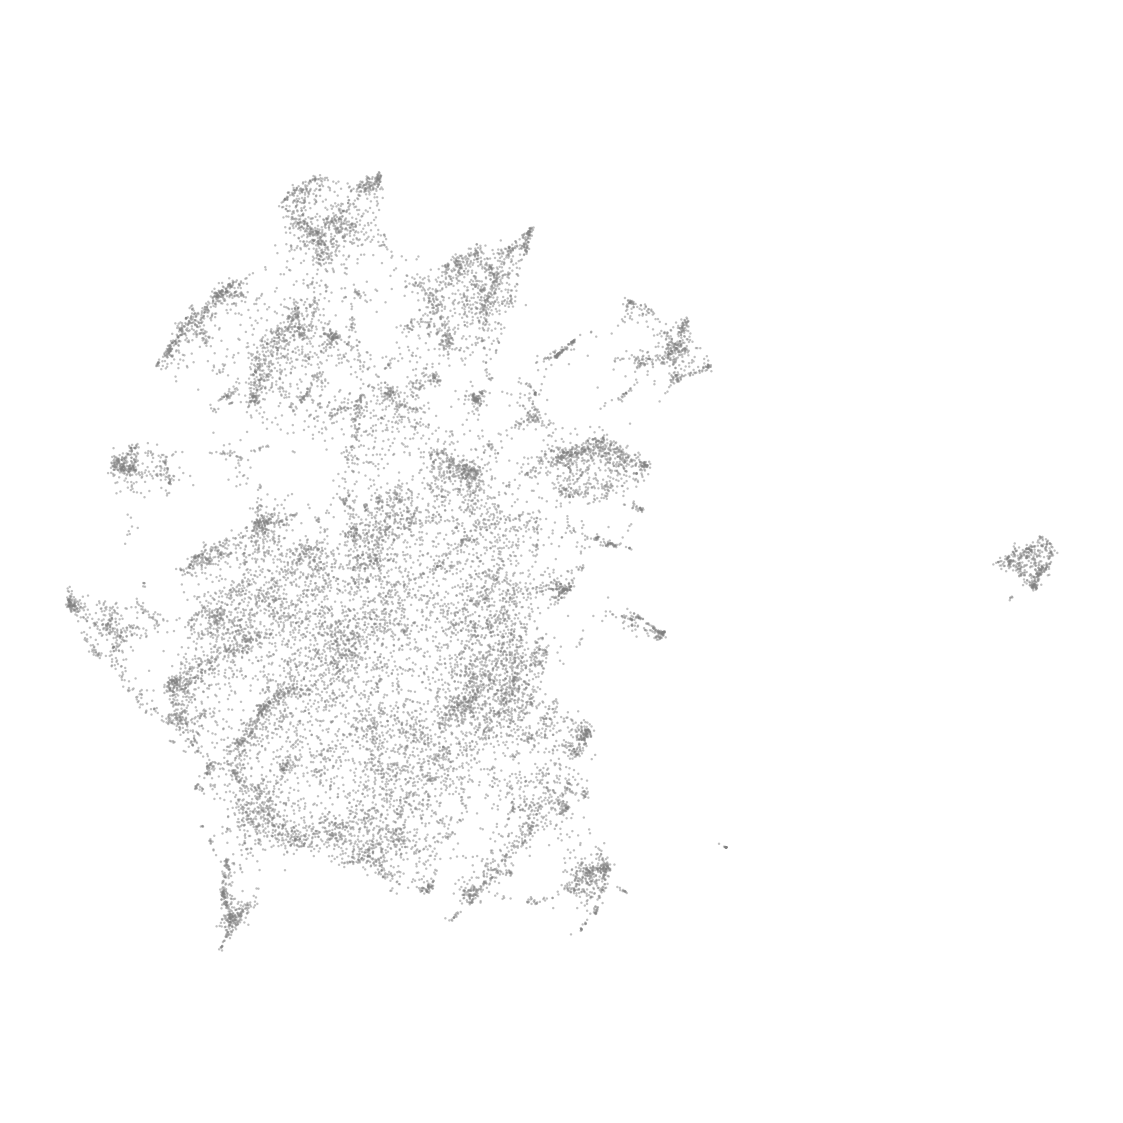

In [18]:
%matplotlib inline

umap = embedding
fig, ax = plt.subplots(figsize=(5.5, 5.5), dpi=200, layout="constrained")

ax.scatter(
    umap[:, 0],
    umap[:, 1],
    s=3,  # Increase size
    c="grey",
    marker=".",
    linewidths=None,
    ec="None",
    alpha=0.5,  # Increase opacity
    rasterized=True,
)

ax.axis("equal")
ax.grid()
# ax.xticks([])
# ax.yticks([])
ax.axis("off")

fig.savefig(figures_path / "umap_pubmedbert_reparsed.png")